In [110]:
import numpy as np
import pandas as pd
import os
from math import isnan
from copy import deepcopy as copy
import matplotlib.pyplot as plt
import glob
import re
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim.test.utils import datapath
from gensim import corpora
from gensim.utils import any2unicode
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS 
from textblob.sentiments import NaiveBayesAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
warnings.filterwarnings(action = 'ignore')

In [2]:
%%time
path2 = os.getcwd()
files_new = glob.glob(path2 + "/IRAhandle_tweets_*.csv")
df_ = pd.DataFrame()
lists = []
for file in files_new:
    df_ = pd.read_csv(file, index_col=None, header=0)
    lists.append(df_)
df_f = pd.concat(lists)

<string>:2: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
<string>:2: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
<string>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
/Users/shaima/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


CPU times: user 22.8 s, sys: 2.94 s, total: 25.7 s
Wall time: 26.5 s


In [3]:
df_f.to_csv("tweets.csv")

In [4]:
full_df = pd.read_csv('tweets.csv', parse_dates = ['publish_date'], low_memory=False)
df = full_df[(full_df['language'] == "English")]
df.drop('Unnamed: 0', axis=1, inplace=True)
df['cleaned'] = df['content'].fillna('').astype(str).map(any2unicode)

/Users/shaima/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/shaima/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'Author_Count')

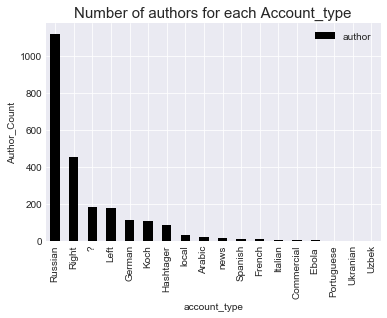

In [20]:
df1 = full_df.drop_duplicates(subset='author')
authors = pd.pivot_table(df1, index='account_type', values='author', aggfunc='count', dropna=True)
authors.sort_values('author',ascending=False).plot(kind="bar", color=tuple(["black"]))
plt.title('Number of authors for each Account_type', fontsize = 15)
plt.ylabel('Author_Count')

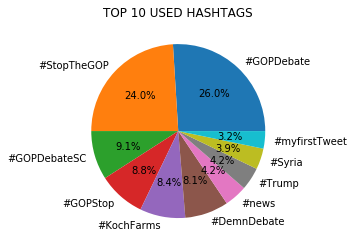

In [31]:
import re
df['cleaned'] = df['content'].fillna('').astype(str).map(any2unicode)
hashtags = []
pattern = re.compile(r"#[a-zA-Z]+")
hashtag_match = list(df['cleaned'].apply(pattern.findall))
hashtag_data = {}
for match in hashtag_match:
    for singlematch in match:
        if singlematch not in hashtag_data.keys():
            hashtag_data[singlematch] = 1
        else:
            hashtag_data[singlematch] = hashtag_data[singlematch]+1
hashtag_list =sorted(hashtag_data.items(), key=lambda x:x[1])
hashtag_list = hashtag_list[::-1]
values = []
keys = []
for item in hashtag_list[0:10]:
    keys.append(item[0])
    values.append(item[1])
values = list(values)
hashtags = list(keys)
plt.pie(values, labels=hashtags, autopct='%.1f%%')
plt.title('TOP 10 USED HASHTAGS')
plt.show()

In [13]:
a = pd.read_csv("cleaned_data.csv")

/Users/shaima/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
a['harvested_date'] = pd.to_datetime(a['harvested_date'])
col = ['tweet_id','alt_external_id']
for col_1 in col:
    a[col_1] = a[col_1].astype('object')
start_date = a['harvested_date'].min()
end_date = a['harvested_date'].max()
print(start_date, end_date)
a['date_data'] = pd.to_datetime(a['harvested_date'].dt.date)
tweets = pd.DataFrame(a['date_data'].value_counts())
tweets.columns = ['tweet_count']
tweets.sort_index(ascending = True, inplace = True)

2012-02-06 20:30:00 2018-06-20 03:32:00


Text(0, 0.5, 'Number of tweets')

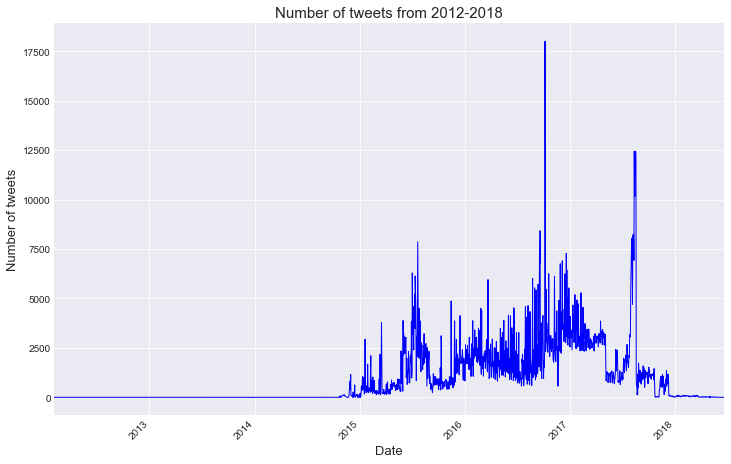

In [27]:
plt.style.use('seaborn-darkgrid')
tweets['tweet_count'].plot(linestyle = "-", figsize = (12,8), rot = 45, color = 'b',
                               linewidth = 1)
plt.title('Number of tweets from 2012-2018', fontsize = 15)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Number of tweets', fontsize = 13)

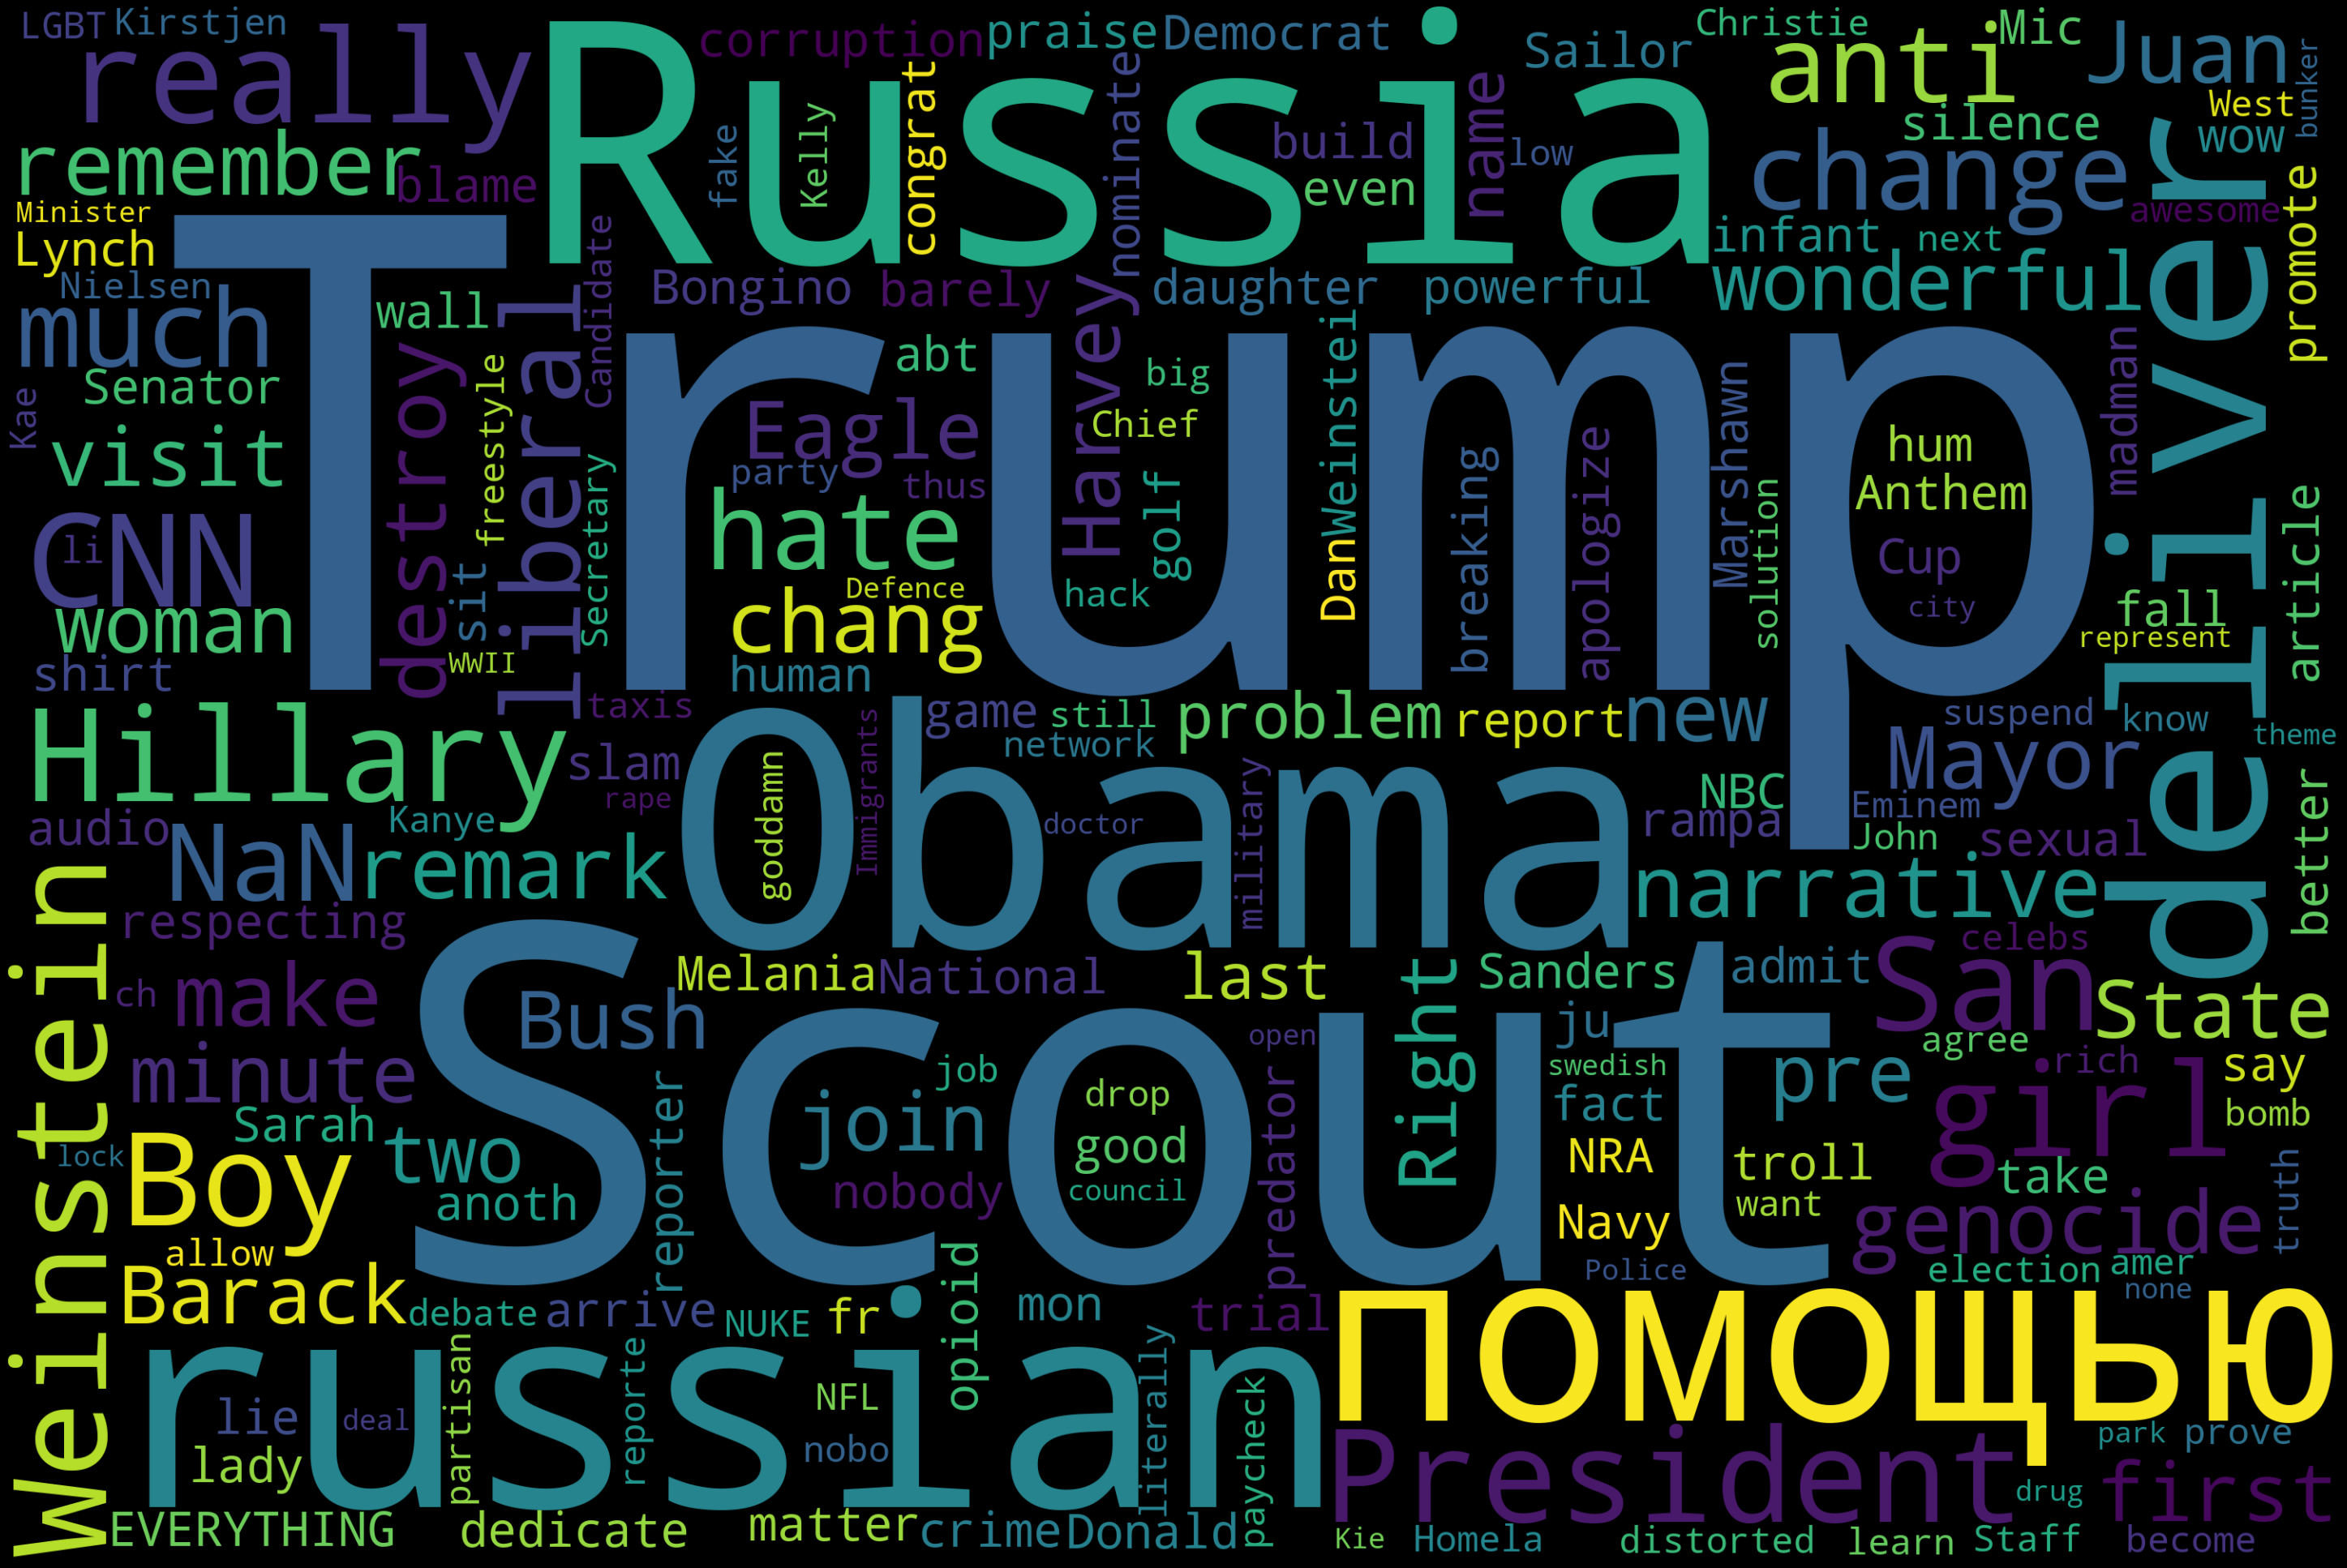

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = a['content']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [55]:
a['harvested_date'] = pd.to_datetime(a['harvested_date'])
a['date_data'] = pd.to_datetime(a['harvested_date'].dt.date)
a['year'] = pd.to_datetime(a['harvested_date'].dt.year)
a['month'] = pd.to_datetime(a['harvested_date'].dt.month)
a['day'] = pd.to_datetime(a['harvested_date'].dt.day)

Text(0, 0.5, 'followers_count')

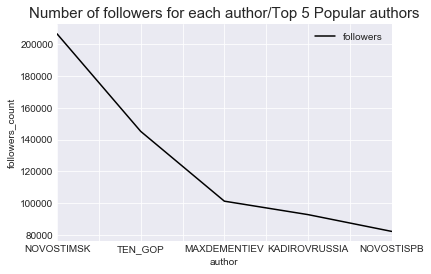

In [57]:
df2 = a[['author', 'followers']]
df2 = df2.groupby(['author'])[['followers']].max()
x = df2.sort_values("followers", ascending =False)[:5]  
x.plot(kind="line", color=tuple(["black"]))
plt.title('Number of followers for each author/Top 5 Popular authors', fontsize = 15)
plt.ylabel('followers_count')
                               

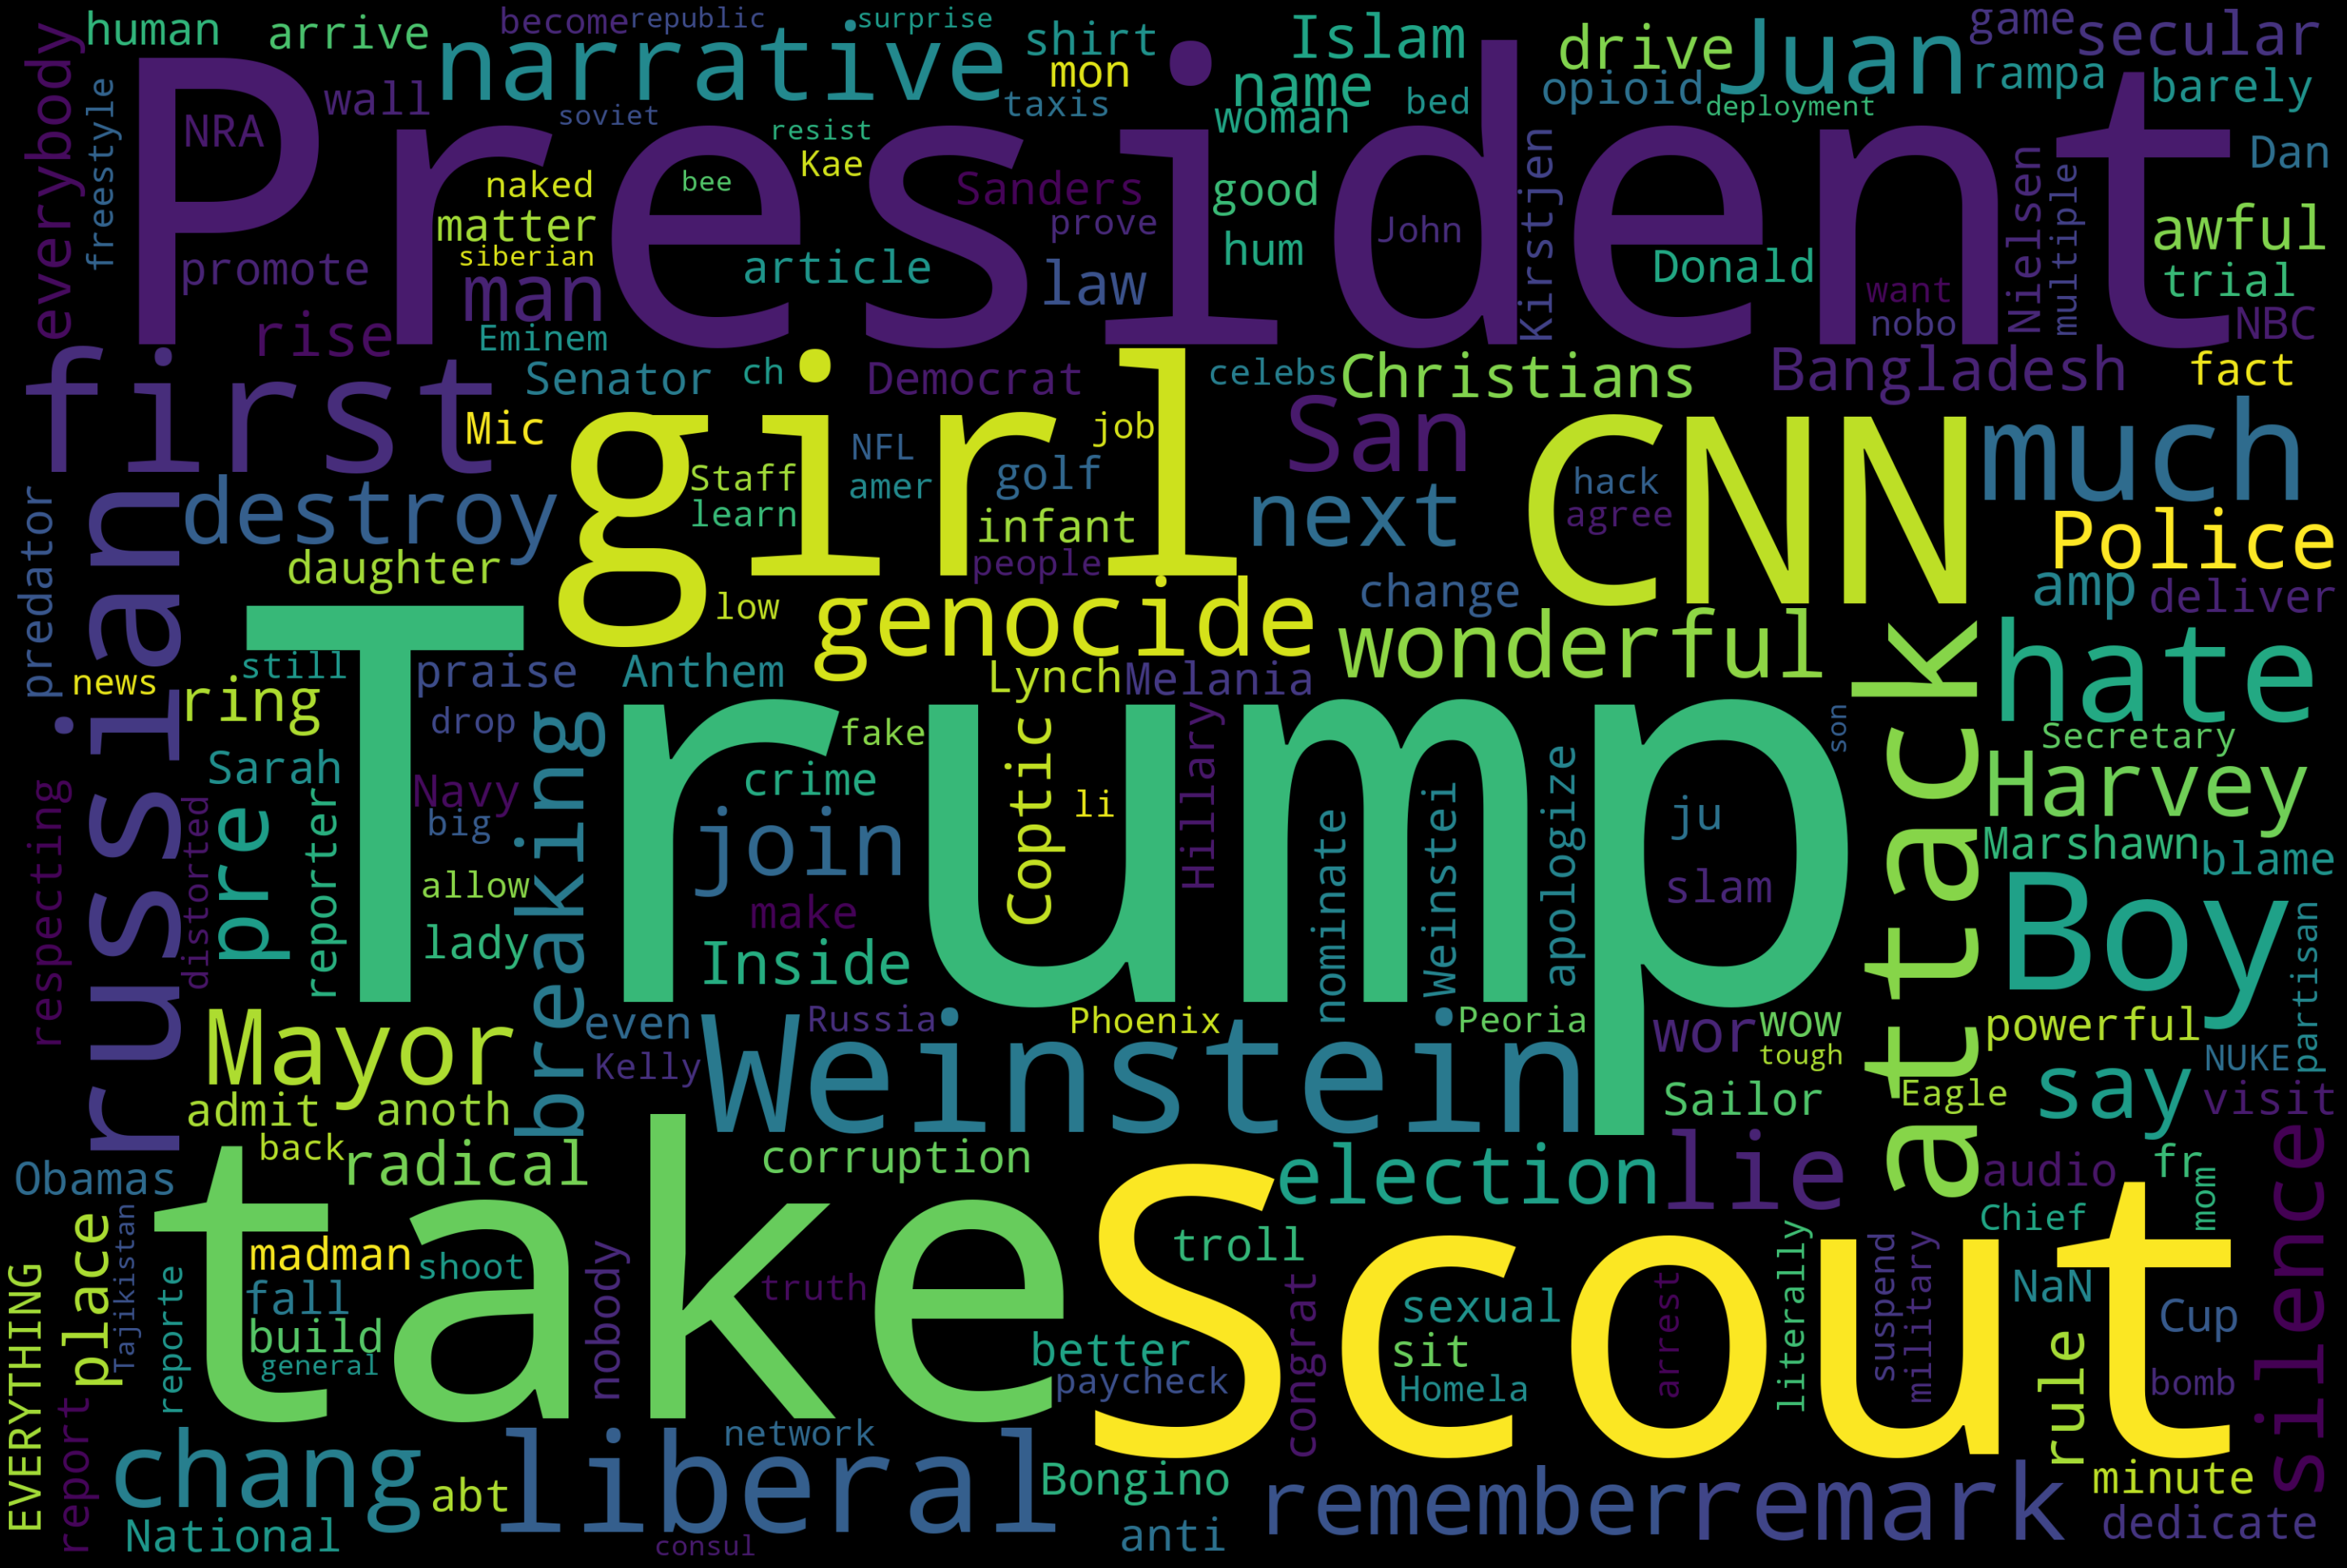

In [76]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
after_election = a[a['date_data']>'2016-11-08']
after_election
text = after_election['content']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [86]:
a['sentiment'] = a['cleaned'].apply(lambda tweets : TextBlob(tweets).sentiment.polarity)

In [87]:
list_pos = a[a['sentiment'] > 0 ]

In [88]:
list_neg = a[a['sentiment'] < 0]

In [89]:
list_zero = a[a['sentiment'] == 0]

In [93]:

import datetime
date_elec = datetime.date(2016, 11, 8)
df_bef_pos = a[(a['sentiment'] > 0) & (a['date_data'] < date_elec)]
df_after_pos = a[(a['sentiment'] > 0) & (a['date_data'] > date_elec)]
df_bef_neg = a[(a['sentiment'] < 0) & (a['date_data'] < date_elec)]
df_after_neg =a[(a['sentiment'] < 0) & (a['date_data'] > date_elec)]
df_sent_neg = a[a['sentiment'] < 0]
df_bef = a[a['date_data'] < date_elec]
df_aft = a[a['date_data'] > date_elec]

/Users/shaima/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shaima/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  after removing the cwd from sys.path.
/Users/shaima/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'. 

([<matplotlib.patches.Wedge at 0x1aaee12908>,
 [Text(-1.0310589178739917, -0.38329819706400065, 'Positive sentiment'),
  Text(1.0310589537609542, 0.3832981005292961, 'Negative sentiment')],
 [Text(-0.5623957733858136, -0.20907174385309124, '61.3%'),
  Text(0.5623957929605204, 0.20907169119779787, '38.7%')])

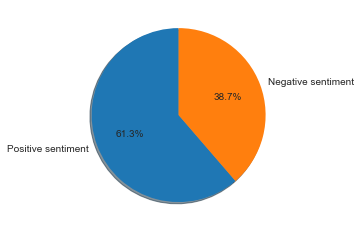

In [94]:
fig1, ax1 = plt.subplots()
ax1.pie([len(df_bef_pos) , len(df_bef_neg)], labels=["Positive sentiment" , "Negative sentiment"], autopct='%1.1f%%', shadow=True, startangle=90)

([<matplotlib.patches.Wedge at 0x1aaeeb3828>,
 [Text(-1.0486923669610524, -0.3320306002127303, 'Positive sentiment'),
  Text(1.0486923980479963, 0.3320305020270628, 'Negative sentiment')],
 [Text(-0.5720140183423921, -0.1811076001160347, '59.8%'),
  Text(0.5720140352989069, 0.18110754656021608, '40.2%')])

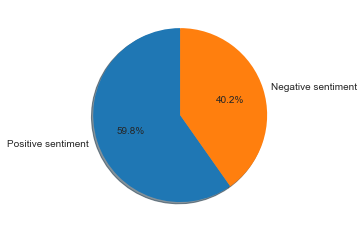

In [95]:
fig1, ax1 = plt.subplots()
ax1.pie([len(df_after_pos) , len(df_after_neg)], labels=["Positive sentiment" , "Negative sentiment"], autopct='%1.1f%%', shadow=True, startangle=90)

In [96]:
df_on_elec = a[a['date_data'] == date_elec]

/Users/shaima/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


([<matplotlib.patches.Wedge at 0x1aaecb7cc0>,
 [Text(-0.935838655857273, -0.5781055355237941, 'Positive sentiment'),
  Text(0.9358386558572732, 0.5781055355237936, 'Negative sentiment')],
 [Text(-0.5104574486494216, -0.31533029210388763, '67.6%'),
  Text(0.5104574486494217, 0.31533029210388736, '32.4%')])

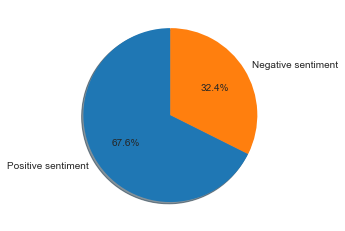

In [97]:
fig , ax1 = plt.subplots()
ax1.pie([len(df_on_elec[df_on_elec['sentiment'] > 0]) , len(df_on_elec[df_on_elec['sentiment'] < 0])] , labels=["Positive sentiment" , "Negative sentiment"], autopct='%1.1f%%', shadow=True, startangle=90)

In [143]:
%%time
data = [] 
import nltk
nltk.download('punkt')
txt = a.cleaned.apply(word_tokenize)  
  
# Create CBOW model 
model1 = gensim.models.Word2Vec(txt, min_count = 1,window = 10, size = 300)
  

[nltk_data] Downloading package punkt to /Users/shaima/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


CPU times: user 10min 25s, sys: 3.91 s, total: 10min 29s
Wall time: 6min 2s


In [144]:
from gensim.models.phrases import Phrases, Phraser
sent = [row.split() for row in a['cleaned']]
phrases = Phrases(sent)

In [145]:
bigram = Phraser(phrases)
sentence = bigram[sent]

In [130]:
words = list(model1.wv.vocab)
print(words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [146]:
print(model1)

Word2Vec(vocab=279109, size=300, alpha=0.025)


In [133]:
model1.most_similar(positive=['girl','president'], topn = 1)

[('Sad', 0.515403151512146)]

In [138]:
model1.most_similar(positive=['President','USA'], topn = 1)

[('crossdresse', 0.510858416557312)]

In [148]:
model1.most_similar(positive=['leader','girl'], topn = 1)

[('boy', 0.6027920246124268)]

In [149]:
model1.most_similar(positive=['leader','boy'], topn = 1)

[('girl', 0.6052294969558716)]

In [159]:
model1.most_similar(positive=['anti','trump'], topn = 1)

[('semitic', 0.569972813129425)]

In [165]:
model1.most_similar(positive=['election','russia'], topn = 1)

[('collusion', 0.5787917971611023)]

In [172]:
model1.most_similar(positive=['usa','destroy'], topn = 1)

[('globalist', 0.5853759050369263)]